In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
employees = ['EA', 'KR', 'KB', 'CP', 'MM', 'MC']
targets = [65, 45, 85, 45, 85, 70]
months = ['Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov',
         'Dec', 'Jan', 'Feb', 'Mar']

In [4]:
df = pd.DataFrame(list(zip(employees, targets)), columns=['Employees', months[0]])
df.set_index('Employees', inplace=True)
df

,Apr
Employees,
EA,65
KR,45
KB,85
CP,45
MM,85
MC,70


In [5]:
for month in months[1:-5]:
    random_data = [random.randrange(60,140)/100 for employee in df.index]
    df[month] = df['Apr'] * random_data
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65,90.35,53.95,69.55,69.55,87.75,72.80
KR,45,31.05,40.50,62.55,41.40,29.25,58.95
KB,85,102.00,77.35,94.35,70.55,103.70,112.20
CP,45,46.35,43.20,30.60,35.10,35.55,31.95
MM,85,51.85,64.60,65.45,86.70,59.50,62.90
MC,70,61.60,53.20,86.10,75.60,66.50,91.00


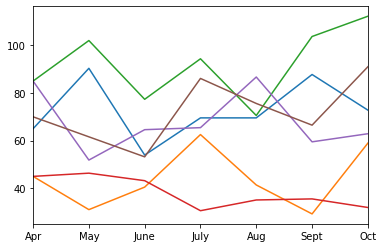

In [6]:
df.T.plot(legend=False)

In [7]:
habitat_avg = df.loc[['EA', 'KR', 'KB']].mean()
habitat_avg

Apr     65.000000
May     74.466667
June    57.266667
July    75.483333
Aug     60.500000
Sept    73.566667
Oct     81.316667
dtype: float64

In [8]:
df.loc['Habitat'] = habitat_avg.T
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.0,90.350000,53.950000,69.550000,69.55,87.750000,72.800000
KR,45.0,31.050000,40.500000,62.550000,41.40,29.250000,58.950000
KB,85.0,102.000000,77.350000,94.350000,70.55,103.700000,112.200000
CP,45.0,46.350000,43.200000,30.600000,35.10,35.550000,31.950000
MM,85.0,51.850000,64.600000,65.450000,86.70,59.500000,62.900000
MC,70.0,61.600000,53.200000,86.100000,75.60,66.500000,91.000000
Habitat,65.0,74.466667,57.266667,75.483333,60.50,73.566667,81.316667


In [9]:
df.loc['Water'] = df.loc[['CP', 'MM', 'MC']].mean()
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.000000,90.350000,53.950000,69.550000,69.55,87.750000,72.800000
KR,45.000000,31.050000,40.500000,62.550000,41.40,29.250000,58.950000
KB,85.000000,102.000000,77.350000,94.350000,70.55,103.700000,112.200000
CP,45.000000,46.350000,43.200000,30.600000,35.10,35.550000,31.950000
MM,85.000000,51.850000,64.600000,65.450000,86.70,59.500000,62.900000
MC,70.000000,61.600000,53.200000,86.100000,75.60,66.500000,91.000000
Habitat,65.000000,74.466667,57.266667,75.483333,60.50,73.566667,81.316667
Water,66.666667,53.266667,53.666667,60.716667,65.80,53.850000,61.950000


In [10]:
#Projected Monthly Utilization = If in month, projected utilization, else actual utilization
projected = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
#Projected Yearly Utilization = weighted average of all utilization

In [11]:
projected

""
Employees
EA
KR
KB
CP
MM
MC
Habitat
Water


In [12]:
projected['Apr'] = df['Apr']
projected

,Apr
Employees,
EA,65.000000
KR,45.000000
KB,85.000000
CP,45.000000
MM,85.000000
MC,70.000000
Habitat,65.000000
Water,66.666667


In [13]:
df.mean(axis=1)

Employees
EA         72.707143
KR         44.100000
KB         92.164286
CP         38.250000
MM         68.000000
MC         72.000000
Habitat    69.657143
Water      59.416667
dtype: float64

In [14]:
df.iloc[:,-1]

Employees
EA          72.800000
KR          58.950000
KB         112.200000
CP          31.950000
MM          62.900000
MC          91.000000
Habitat     81.316667
Water       61.950000
Name: Oct, dtype: float64

In [15]:
for month in months:
    if month in df.columns:
        projected[month] = df[month]
    else:
        projected[month] = df.iloc[:,-1]
projected

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,90.350000,53.950000,69.550000,69.55,87.750000,72.800000,72.800000,72.800000,72.800000,72.800000,72.800000
KR,45.000000,31.050000,40.500000,62.550000,41.40,29.250000,58.950000,58.950000,58.950000,58.950000,58.950000,58.950000
KB,85.000000,102.000000,77.350000,94.350000,70.55,103.700000,112.200000,112.200000,112.200000,112.200000,112.200000,112.200000
CP,45.000000,46.350000,43.200000,30.600000,35.10,35.550000,31.950000,31.950000,31.950000,31.950000,31.950000,31.950000
MM,85.000000,51.850000,64.600000,65.450000,86.70,59.500000,62.900000,62.900000,62.900000,62.900000,62.900000,62.900000
MC,70.000000,61.600000,53.200000,86.100000,75.60,66.500000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
Habitat,65.000000,74.466667,57.266667,75.483333,60.50,73.566667,81.316667,81.316667,81.316667,81.316667,81.316667,81.316667
Water,66.666667,53.266667,53.666667,60.716667,65.80,53.850000,61.950000,61.950000,61.950000,61.950000,61.950000,61.950000


In [16]:
projected.loc[:,'Apr': 'July']

,Apr,May,June,July
Employees,,,,
EA,65.000000,90.350000,53.950000,69.550000
KR,45.000000,31.050000,40.500000,62.550000
KB,85.000000,102.000000,77.350000,94.350000
CP,45.000000,46.350000,43.200000,30.600000
MM,85.000000,51.850000,64.600000,65.450000
MC,70.000000,61.600000,53.200000,86.100000
Habitat,65.000000,74.466667,57.266667,75.483333
Water,66.666667,53.266667,53.666667,60.716667


In [17]:
projected_y = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
for month in months:
    projected_y[month] = projected.loc[:,months[0]:month].mean(axis=1)
projected_y

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,77.675000,69.766667,69.712500,69.680000,72.691667,72.707143,72.718750,72.727778,72.735000,72.740909,72.745833
KR,45.000000,38.025000,38.850000,44.775000,44.100000,41.625000,44.100000,45.956250,47.400000,48.555000,49.500000,50.287500
KB,85.000000,93.500000,88.116667,89.675000,85.850000,88.825000,92.164286,94.668750,96.616667,98.175000,99.450000,100.512500
CP,45.000000,45.675000,44.850000,41.287500,40.050000,39.300000,38.250000,37.462500,36.850000,36.360000,35.959091,35.625000
MM,85.000000,68.425000,67.150000,66.725000,70.720000,68.850000,68.000000,67.362500,66.866667,66.470000,66.145455,65.875000
MC,70.000000,65.800000,61.600000,67.725000,69.300000,68.833333,72.000000,74.375000,76.222222,77.700000,78.909091,79.916667
Habitat,65.000000,69.733333,65.577778,68.054167,66.543333,67.713889,69.657143,71.114583,72.248148,73.155000,73.896970,74.515278
Water,66.666667,59.966667,57.866667,58.579167,60.023333,58.994444,59.416667,59.733333,59.979630,60.176667,60.337879,60.472222


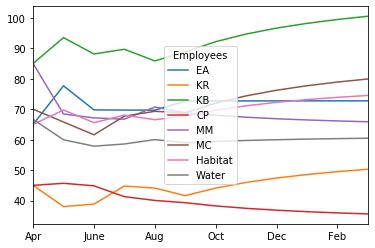

In [18]:
projected_y.T.plot()

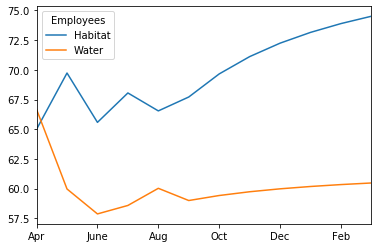

In [19]:
projected_y.loc[['Habitat', 'Water'],:].T.plot()

In [29]:
projected_y.reset_index()

,Employees,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
0,EA,65.000000,77.675000,69.766667,69.712500,69.680000,72.691667,72.707143,72.718750,72.727778,72.735000,72.740909,72.745833
1,KR,45.000000,38.025000,38.850000,44.775000,44.100000,41.625000,44.100000,45.956250,47.400000,48.555000,49.500000,50.287500
2,KB,85.000000,93.500000,88.116667,89.675000,85.850000,88.825000,92.164286,94.668750,96.616667,98.175000,99.450000,100.512500
3,CP,45.000000,45.675000,44.850000,41.287500,40.050000,39.300000,38.250000,37.462500,36.850000,36.360000,35.959091,35.625000
4,MM,85.000000,68.425000,67.150000,66.725000,70.720000,68.850000,68.000000,67.362500,66.866667,66.470000,66.145455,65.875000
5,MC,70.000000,65.800000,61.600000,67.725000,69.300000,68.833333,72.000000,74.375000,76.222222,77.700000,78.909091,79.916667
6,Habitat,65.000000,69.733333,65.577778,68.054167,66.543333,67.713889,69.657143,71.114583,72.248148,73.155000,73.896970,74.515278
7,Water,66.666667,59.966667,57.866667,58.579167,60.023333,58.994444,59.416667,59.733333,59.979630,60.176667,60.337879,60.472222


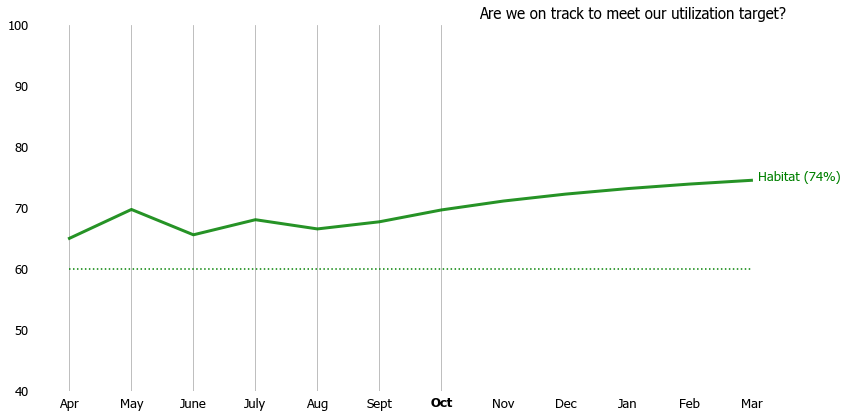

In [20]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
# ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
# ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, zorder=10)
# ax.bar(np.arange(12), habitat_max, width=.05, color='green', alpha=.2)
# ax.bar(np.arange(12), habitat_min, color='white')

# water_min = data[['CP','MM','MC']].min(axis=1)
# water_max = data[['CP','MM','MC']].max(axis=1)
# ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
# ax.plot([water_target]*12, color=water_color, linestyle='dotted')

# ax.plot(data[['EA','KR','KB']], linestyle='', marker='_', color='green', alpha=.6)

# ax.axvline(6, color='grey', alpha=.4, linewidth=3)

# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(40, 100)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.xaxis.grid(True)

# Axes ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
# plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color,
#         fontsize=12)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

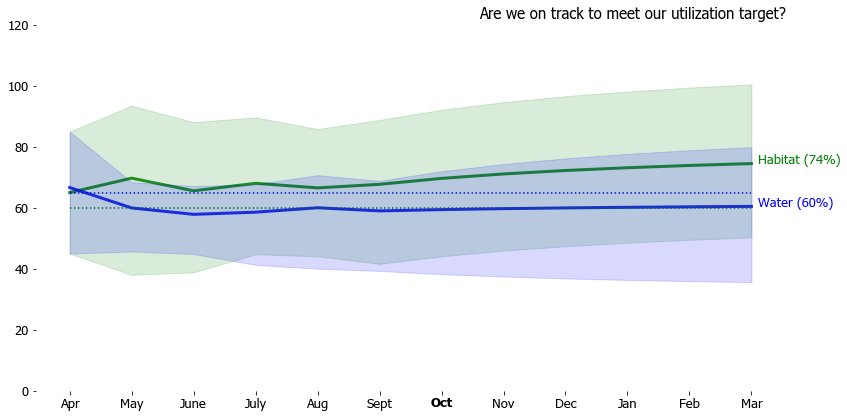

In [21]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, 
                zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15,
               zorder=10)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax.plot([water_target]*12, color=water_color, linestyle='dotted')


# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

In [52]:
data = projected_y.T.reset_index()

In [53]:
data.reset_index(inplace=True,drop=True)

In [54]:
data.index

RangeIndex(start=0, stop=12, step=1)

In [55]:
data= pd.read_excel()

Employees,index,EA,KR,KB,CP,MM,MC,Habitat,Water
0,Apr,65.000000,45.00000,85.000000,45.000000,85.000000,70.000000,65.000000,66.666667
1,May,77.675000,38.02500,93.500000,45.675000,68.425000,65.800000,69.733333,59.966667
2,June,69.766667,38.85000,88.116667,44.850000,67.150000,61.600000,65.577778,57.866667
3,July,69.712500,44.77500,89.675000,41.287500,66.725000,67.725000,68.054167,58.579167
4,Aug,69.680000,44.10000,85.850000,40.050000,70.720000,69.300000,66.543333,60.023333
5,Sept,72.691667,41.62500,88.825000,39.300000,68.850000,68.833333,67.713889,58.994444
6,Oct,72.707143,44.10000,92.164286,38.250000,68.000000,72.000000,69.657143,59.416667
7,Nov,72.718750,45.95625,94.668750,37.462500,67.362500,74.375000,71.114583,59.733333
8,Dec,72.727778,47.40000,96.616667,36.850000,66.866667,76.222222,72.248148,59.979630
9,Jan,72.735000,48.55500,98.175000,36.360000,66.470000,77.700000,73.155000,60.176667


KeyError: 'Mar'

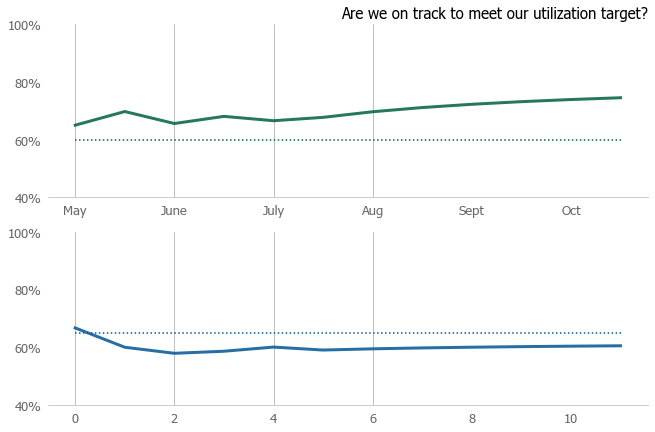

In [56]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

# data = projected_y.T
current_month = 6

water_color= '#005595'
habitat_color= '#006040'
water_target = 65
habitat_target = 60

fig, axes = plt.subplots(2,1,figsize=[10.75,7])
ax1 = axes[0]
ax2 = axes[1]

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax1.axes.axvline(i, color='white', linewidth=2)
    ax2.axes.axvline(i, color='white', linewidth=2)

# Plot data
ax1.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax2.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)

# Plot targets
ax1.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax2.plot([water_target]*12, color=water_color, linestyle='dotted')

# Set title
ax1.set_title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Adjust axes ranges
ax1.set_ylim(40, 100)
ax2.set_ylim(40, 100)

# Adjust number of labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))

# Format labels as percent
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Set axis labels
ax1.set_xticklabels(data['index'])

# Add grid Lines
ax1.yaxis.grid(False)
ax1.xaxis.grid(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(True)

# Customize grid lines
ax1.axes.grid(axis='x', linestyle='-')
ax2.axes.grid(axis='x', linestyle='-')

# Set below graph objects
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

# Remove Axes ticks
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Recolor axis labels
ax1.tick_params(colors='dimgrey')
ax2.tick_params(colors='dimgrey')

# Remove axes spines
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('silver')

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('silver')

# Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
ax1.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
ax2.text(11.1, water_value, f'Water ({int(habitat_value)}%)', color=water_color)

# Indicate current month
ax1.get_xticklabels()[current_month].set_fontweight('bold')
ax1.get_xticklabels()[current_month].set_color(habitat_color) #Black draws too much attention as new color
ax2.get_xticklabels()[current_month].set_fontweight('bold')
ax2.get_xticklabels()[current_month].set_color(water_color)

plt.show()

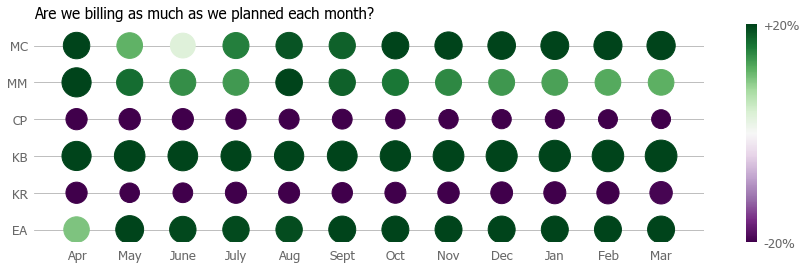

In [23]:
fig, ax3 = plt.subplots(figsize=[15,4])

ax3.set_title('Are we billing as much as we planned each month?', loc='left', fontsize=15)

# colorbar = ax3.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
# norm = colors.Normalize()
cmap_code = 'PRGn'
norm = plt.Normalize(vmin=50, vmax=70)

for idx, emp in enumerate(employees):
    x = data.index
    y = [idx] * len(data.index)
    size = data[emp]
    color = data[emp] # Set to calculated array of actual minus planned
    ax3.scatter(x, y, s=size*10, c=color, cmap=cmap_code, norm=norm)
#     ax3.scatter(x, y, s=size*10, c=color, cmap='PRGn', vmin=50, vmax=70)
#     ax.scatter(x, y, s=size, facecolors='none', edgecolors='blue')

ax3.set_yticklabels([''] + employees + [''])  # top and bottom ticks are blank

ax3.yaxis.grid(True)
ax3.set_axisbelow(True)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# ax3.tick_params(axis='x', pad=30)

# Recolor axis labels
ax3.tick_params(colors='dimgrey')

# fig.colorbar(ax=ax3)
cmap = plt.cm.ScalarMappable(cmap=cmap_code, norm=norm)
cbar = plt.colorbar(cmap, ax=ax3, ticks=[50,70])
# cbar.set_label('% Utilization Over/Under Planned Utilization', color='dimgrey')
cbar.outline.set_edgecolor('none')
cbar.ax.yaxis.set_tick_params(color='none')
cbar.ax.set_yticklabels(['-20%', '+20%'])
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='dimgrey')


plt.show()

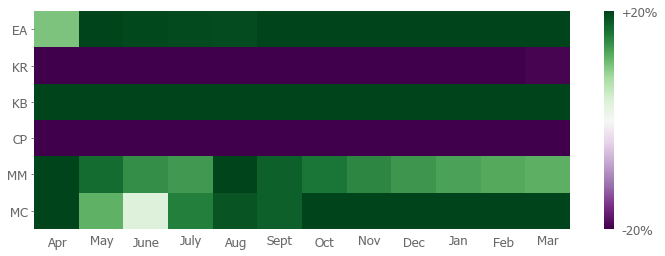

In [24]:
data = projected_y[:-2].T

fig, ax4 = plt.subplots(figsize=[12,4])

cmap_code = 'PRGn'
norm = plt.Normalize(vmin=50, vmax=70)

ax4.imshow(data.T, cmap=cmap_code, norm=norm, aspect='auto')

ax4.set_yticklabels([''] + employees + [''])  # top and bottom ticks are blank

ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

ax4.tick_params(axis='x', which='both', bottom=False, top=False)

ax4.xaxis.set_minor_locator(plt.MaxNLocator(12))

# Recolor axis labels
ax4.tick_params(colors='dimgrey', which='both')

ax4.set_xticklabels([''] + list(data.index[::2]), minor=False)
ax4.set_xticklabels([''] + list(data.index[1::2]), minor=True)

cmap = plt.cm.ScalarMappable(cmap=cmap_code, norm=norm)
cbar = plt.colorbar(cmap, ax=ax4, ticks=[50,70])
# cbar.set_label('% Utilization Over/Under Planned Utilization', color='dimgrey')
cbar.outline.set_edgecolor('none')
cbar.ax.yaxis.set_tick_params(color='none')
cbar.ax.set_yticklabels(['-20%', '+20%'])
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='dimgrey')

plt.show()

In [25]:
import xml.etree.ElementTree as et
import pandas as pd

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element.
    https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [26]:
df = pd.read_csv('../Billable Hours Report 2019-12-09.csv')
project_class_table = pd.read_csv('../project-classification.csv')

FileNotFoundError: [Errno 2] File b'../Billable Hours Report 2019-12-09.csv' does not exist: b'../Billable Hours Report 2019-12-09.csv'

In [ ]:
employees = list(set(df['User Name']))
employee_initials = [employee.split(',')[1][1:3] + employee.split(',')[0][0] for employee in employees]
employee_initials